In [2]:
import itertools
import numpy as np
import pandas as pd
import concurrent.futures
import numpy as np
import math
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, ConfusionMatrixDisplay, auc, roc_auc_score, f1_score, confusion_matrix
from sklearn import datasets
from statistics import mean
import includes.model as mod
import pandas as pd
from joblib import dump, load
from includes.config import Config
import includes.model_functions as mf
import time
from itertools import combinations
import random
from graphviz import Digraph
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from datetime import datetime 
import os
import argparse
from itertools import count
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Example dataset with age, education, employment status, and income
data_australia = {
    'bachelors_count': [1000],
    'tertiary_education': [100000],  
    'highest_year_graduated': [45],  
    'rate_of_mental_health': [1010]
}

df = pd.DataFrame(data_australia)
print(df)
# Define features (X) and target (y)
X = df[['bachelors_count', 'tertiary_education', 'highest_year_graduated']]
y = df['rate_of_mental_health']

# Initialize and train linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients for each feature
# coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Display the coefficients
print("Regression Coefficients:")
print(model.coef_)
# print(coefficients)

# Predictions (optional)
data_england = {
    'bachelors_count': [10],
    'tertiary_education': [10000],
    'highest_year_graduated': [3],
    'rate_of_mental_health': [101]
}
df_predict = pd.DataFrame(data_england)
X_test = df_predict[['bachelors_count', 'tertiary_education', 'highest_year_graduated']]
y_test = df_predict['rate_of_mental_health']
y_pred = model.predict(X_test)
print(f"Predicted mental health:{y_pred}")
print(f"True mental health:{y_test}")
print(f"mse: {mean_squared_error(y_test, y_pred)}")

In [ ]:
new_df = pd.concat([df, df_predict], ignore_index=True)
correlation_matrix = new_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Prepare data

Data must have: 
- target class = Y
- features all non categorical

In [ ]:
# pen based digits
config = Config("testing_datasets")
pen_based_recognition_of_handwritten_digits = fetch_ucirepo(id=81) 
filename = "pen_based_classifier"
model_types = ['LogisticRegression']
df = pen_based_recognition_of_handwritten_digits.data.original
# print(df['Class'])
# ecoli_data = ecoli_data.head(1000)
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/handwritten_digits.csv")
df
# df = df.head(1000)
# df['Y'], unique_strings = pd.factorize(df['class'])
# ecoli_data['Sequence_numerical'], unique_seq_strings = pd.factorize(ecoli_data['Sequence'])
# df.drop(['class', 'Sequence'], axis=1, inplace=True)
# ecoli_data['Y'] = ecoli_data['encoded_Y']
# print(df)

In [ ]:
# Ecoli details
df = fetch_ucirepo(id=39) 
file_name = 'ecoli'
model_types = ['LogisticRegression']
df = df.data.original
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/beans_data.csv")
df = pd.read_csv("ecoli.csv")
df

In [ ]:
df = pd.read_csv("data/ecoli.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df

In [ ]:
# beans data
file_name = "beans_datasets"
config = Config("beans_datasets")
df = fetch_ucirepo(id=602)
filename = "beans_data"
model_types = ['LogisticRegression']
df = df.data.original
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/beans_data.csv")
df

In [ ]:
# letter recognition
config = Config("letter_rec")
letter_recognition = fetch_ucirepo(id=59) 
letter_recognition_data = letter_recognition.data.original
filename = "letter_recognition"
# model_types = ['randomForest', 'LogisticRegression', 'xgboost']
model_types = ['LogisticRegression']
transform_label = LabelEncoder()
# letter_recognition_data['lettr'] = transform_label.fit_transform(letter_recognition_data['lettr'])
df = letter_recognition_data
df.rename({'lettr': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/letter_recognition.csv")
# ecoli_data = abalone.data.original
# df.to_csv("data/letter_recognition.csv")
df

In [ ]:
# statlog
statlog_shuttle = fetch_ucirepo(id=148) 
df = statlog_shuttle.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
df.to_csv("data/statlog_data.csv")


In [ ]:
# Room Occupany
df = fetch_ucirepo(id=864) 
df = df.data.original
df.rename({'Room_Occupancy_Count': 'Y'}, axis=1, inplace=True)
# df
df = mf.one_hot_encode(df, "Date")
df = mf.one_hot_encode(df, "Time")
# df.to_csv("data/room_occupancy_data.csv")
df

In [ ]:
# Yeast data
config = Config("yeast")
filename = "yeast"
yeast = fetch_ucirepo(id=110) 
df = yeast.data.original
# transform_label = LabelEncoder()
df.drop('Sequence_Name', axis=1, inplace=True)
df.rename({'localization_site': 'Y'}, axis=1, inplace=True)
# pre_transform_categories = tuple(df['Y'].unique())
# df['Y'] = transform_label.fit_transform(df['Y'])
# mapped_categories = dict(zip(pre_transform_categories, transform_label.transform(pre_transform_categories)))
# config.log.info(f"mapped categories: {mapped_categories}")
# df = mf.one_hot_encode(df, "Sequence_Name")
# df.to_csv("data/yeast.csv")
df

In [ ]:
# vowel data
config = Config("beans_datasets")
df = fetch_ucirepo(id=602)
df = df.data.original
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/beans_data.csv")
df

In [ ]:
# satimage
df = fetch_ucirepo(id=146)
df = df.data.original
config =  Config("satimage")
filename = 'satimage'
df.rename({'class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/beans_data.csv")
# df.to_csv("data/satimage.csv")

In [ ]:
# glass data
config = Config("glass_datasets")
filename = "glass_datasets"
df = fetch_ucirepo(id=42)
df = df.data.original
df.drop('Id_number', axis=1, inplace=True)
df.rename({'Type_of_glass': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/glass_data.csv")
df

In [ ]:
letter_recognition = fetch_ucirepo(id=59) 
letter_recognition_data = letter_recognition.data.original

In [ ]:
# Abalone
config = Config("testing_datasets")
filename = "abalone_classifier"
abalone = pd.read_csv("data/abalone.csv")
abalone.rename({'Rings': 'Y'}, axis=1, inplace=True)
df = mf.one_hot_encode(abalone, "Sex")
print(df)

In [ ]:
# Image segmentation
df = fetch_ucirepo(id=147) 
df = df.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/image_segment.csv")

In [ ]:
# Covertype data
df = fetch_ucirepo(id=31) 
df = df.data.original
df.rename({'Cover_Type': 'Y'}, axis=1, inplace=True)
df.to_csv("data/cover_type.csv")

In [3]:
# Car evaluation data
df = fetch_ucirepo(id=19) 
df = df.data.original
df = mf.one_hot_encode(df, "buying")
df = mf.one_hot_encode(df, "maint")
df = mf.one_hot_encode(df, "doors")
df = mf.one_hot_encode(df, "persons")
df = mf.one_hot_encode(df, "lug_boot")
df = mf.one_hot_encode(df, "safety")
df.rename({'class': 'Y'}, axis=1, inplace=True)
df.to_csv("data/car_evaluation.csv")

In [ ]:
# pageblocks data
df = fetch_ucirepo(id=78) 
df = df.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
filename = 'pageblocks'
# df.to_csv("data/pageblocks.csv")

In [ ]:
# optdigits data
df = fetch_ucirepo(id=80) 
df = df.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
df.to_csv("data/optdigits.csv")

In [ ]:
# Bike sharing data
df = fetch_ucirepo(id=275) 
df = df.data.original
df.rename({'cnt': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/bike_sharing.csv")
df

In [ ]:
# mfeat-factors data
filename = "mfeat-factors" 
df = pd.read_csv("data/mfeat/mfeat-fac", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-factors.csv")

In [1]:
#mfeat-fourier data
filename = 'mfeat-fourier'
config = Config(filename)
df = pd.read_csv("data/mfeat/mfeat-fou", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-fouriers.csv")

NameError: name 'Config' is not defined

In [ ]:
#mfeat-karhunen data
df = pd.read_csv("data/mfeat/mfeat-kar", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
df.to_csv("data/mfeat-karhunen.csv")

In [ ]:
#mfeat-pixel data
df = pd.read_csv("data/mfeat/mfeat-pix", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
df.to_csv("data/mfeat-pixel.csv")
df

In [2]:
#mfeat-morphological data
df = pd.read_csv("data/mfeat/mfeat-mor", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-morphological.csv")

NameError: name 'pd' is not defined

In [ ]:
#mfeat-zernlike data
df = pd.read_csv("data/mfeat/mfeat-zer", delim_whitespace=True, header=None)
filename = "mfeat-zernlike"
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-zernlike.csv")

In [ ]:
# zoo data
df = fetch_ucirepo(id=111) 
df = df.data.original
df.rename({'type': 'Y'}, axis=1, inplace=True)
filename = 'zoo'
# df.fillna(-1)
df.drop('animal_name', axis=1, inplace=True)
# df.to_csv("data/zoo.csv")

In [ ]:
grouped_df = df.groupby('Y').size().reset_index(name='counts')
# df = df.loc[(df['Y'] > 4) & (df['Y'] < 17)]
# grouped_df = df.groupby('Y').size().reset_index(name='counts')
grouped_df

In [ ]:
df.to_csv("data/abalone_culled.csv")

In [ ]:
# wine quality dataset
df = fetch_ucirepo(id=186) 
df = df.data.original
df.rename({'quality': 'Y'}, axis=1, inplace=True)
df = mf.one_hot_encode(df, "color")
df.to_csv("data/wine_quality_data.csv")
filename = "wine_quality"

In [ ]:
# breast cancer
df = fetch_ucirepo(id=14)
df = df.data.original
df.rename({'Class': 'Y'}, axis=1, inplace=True)
df

In [ ]:
df

# Run my model

In [ ]:
# Run my ML model
# if not transform_label:
#     transform_label = None
if not filename:
    filename = 'unsure_dataset'

config = Config(filename)
transform_label = mf.map_categorical_target(config, df)
model_types = ['randomForest', 'LogisticRegression','xgboost']
model_types = ['SVM']
# model_types = ['svm']

X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], stratify=df['Y'], test_size=0.2, random_state=42)
score_type = 'accuracy'
# categories = tuple((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))
categories = tuple(df['Y'].unique())
best_tree = mf.stepwise_tree_finder(config, categories, X_train, [], {}, model_types=model_types, score_type=score_type)
config.log.info('Finished stepwise tree finder.')
model_strucs = list(best_tree.keys())
tree_types = list(best_tree.values())
print(model_strucs)
print(tree_types)
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label, model_types)

In [ ]:
list1 = [1,2,3,4,5,6,7]
size_list = len(list1) - 1
rev = []
for i in range(len(list1)):
    rev.append(list1[size_list - i])
# print(rev)

In [ ]:
# Replicate the server run
X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], test_size=0.2, random_state=42)
model_strucs = [((0, 3, 8), (1, 2, 5, 4, 6, 7, 9)), ((0,), (8, 3)), ((3,), (8,)), ((2,), (1, 5, 4, 6, 7, 9)),  ((5,), (1, 4, 6, 7, 9)), ((7, 1, 4), (6, 9)), ((6,), (9,)), ((7,), (1, 4)), ((1,), (4,))]
tree_types = ['LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression']
tree_types = 'LogisticRegression'
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label)

In [ ]:
# Replicate the server run
X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], test_size=0.2, random_state=42)
model_strucs = [((0, 3, 8), (1, 2, 5, 4, 6, 7, 9)), ((0,), (8, 3)), ((3,), (8,)), ((2,), (1, 5, 4, 6, 7, 9)),  ((5,), (1, 4, 6, 7, 9)), ((7, 1, 4), (6, 9)), ((6,), (9,)), ((7,), (1, 4)), ((1,), (4,))]
tree_types = ['LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression']
tree_types = 'LogisticRegression'
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label)

In [ ]:
model_strucs = [((0, 3, 8), (1, 2, 5, 4, 6, 7, 9)), ((0,), (8, 3)), ((3,), (8,)), ((2,), (1, 5, 4, 6, 7, 9)),  ((5,), (1, 4, 6, 7, 9)), ((7, 1, 4), (6, 9)), ((6,), (9,)), ((7,), (1, 4)), ((1,), (4,))]
tree_types = ['LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression']
tree_types = 'LogisticRegression'
transform_label = mf.map_categorical_target(config, df)
built_mods = mf.build_single_models(config, best_tree, X_train, score_type=score_type, train_type=tree_types)
mf.test_single_models(built_mods, X_test)


In [ ]:
# transform_label = mf.map_categorical_target(config, df)
X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], stratify=df['Y'], test_size=0.2, random_state=42)
score_type = 'accuracy'
categories = tuple(df['Y'].unique())

In [ ]:
transform_label = mf.map_categorical_target(config, df)

In [ ]:
categories = tuple((19, 13, 6, 18, 1, 0, 9, 23, 14, 17, 5, 2, 7, 15, 4, 16, 20, 10, 25))
best_tree = mf.stepwise_tree_finder(config, categories, X_train, X_test, {}, model_types=model_types, score_type=score_type)
config.log.info('Finished stepwise tree finder.')
model_strucs = list(best_tree.keys())
tree_types = list(best_tree.values())
print(model_strucs)
print(tree_types)

In [ ]:
# used = transform_label.transform(['M', 'W', 'V', 'Y', 'I', 'L'])
used = transform_label.transform(['Z', 'S', 'M', 'W', 'V', 'Y', 'I', 'L'])
left = transform_label.transform(['E', 'D', 'B', 'P', 'R', 'F'])
transform_label.transform(['C', 'G'])
transform_label.transform(['E', 'D', 'B', 'P', 'R', 'F'])
transform_label.transform(['E', 'D', 'B', 'P', 'R', 'F'])
transform_label.transform(['I', 'T', 'L'])
transform_label.transform(['C', 'G'])
transform_label.transform(['I', 'L'])
right = tuple(x for x in categories if x not in left and x not in used) 
built_mods = mf.build_single_models(config, [[tuple(left), tuple(right)]], X_train, score_type='accuracy', train_type='LogisticRegression')
print(mf.test_single_models(built_mods, X_test))

In [ ]:
print(used)
tuple(transform_label.transform(['I'])), tuple(transform_label.transform(['L']))


In [ ]:
transform_label.inverse_transform((16, 6))

In [ ]:
#Building a tree for letters
manual_tree=[ 
    [tuple(transform_label.transform(['M', 'W'])), tuple(transform_label.transform(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']))], 
    [tuple(transform_label.transform(['M'])), tuple(transform_label.transform(['W']))],
    [tuple(transform_label.transform(['V', 'Y'])), tuple(transform_label.transform(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'L', 'P', 'E', 'Q', 'U', 'K', 'Z']))], 
    [tuple(transform_label.transform(['V'])), tuple(transform_label.transform(['Y']))], 
    [tuple(transform_label.transform(['I', 'L'])), tuple(transform_label.transform(['T', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K', 'Z']))],
    [tuple(transform_label.transform(['I'])), tuple(transform_label.transform(['L']))], 
    [tuple(transform_label.transform(['Z', 'S'])), tuple(transform_label.transform(['T', 'D', 'N', 'G', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['Z'])), tuple(transform_label.transform(['S']))], 
    [tuple(transform_label.transform(['D'])), tuple(transform_label.transform(['T', 'N', 'G', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))], 
    [tuple(transform_label.transform(['J'])), tuple(transform_label.transform(['T', 'N', 'G', 'B', 'A', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))], 
    [tuple(transform_label.transform(['A'])), tuple(transform_label.transform(['T', 'N', 'G', 'B', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['T'])), tuple(transform_label.transform(['N', 'G', 'B', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['N'])), tuple(transform_label.transform(['G', 'B', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['P', 'F'])), tuple(transform_label.transform(['G', 'B', 'X', 'O', 'R', 'C', 'H', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['P'])), tuple(transform_label.transform(['F']))], 
    [tuple(transform_label.transform(['U'])), tuple(transform_label.transform(['G', 'B', 'X', 'O', 'R', 'C', 'H', 'E', 'Q', 'K']))],
    [tuple(transform_label.transform(['X'])), tuple(transform_label.transform(['G', 'B', 'O', 'R', 'C', 'H', 'E', 'Q', 'K']))],
    [tuple(transform_label.transform(['K'])), tuple(transform_label.transform(['G', 'B', 'O', 'R', 'C', 'H', 'E', 'Q']))],
    [tuple(transform_label.transform(['C', 'E'])), tuple(transform_label.transform(['G', 'B', 'O', 'R', 'H', 'Q']))],
    [tuple(transform_label.transform(['C'])), tuple(transform_label.transform(['E']))], 
    [tuple(transform_label.transform(['O', 'H'])), tuple(transform_label.transform(['G', 'B', 'R', 'Q']))],
    [tuple(transform_label.transform(['O'])), tuple(transform_label.transform(['H']))], 
    [tuple(transform_label.transform(['Q', 'G'])), tuple(transform_label.transform(['B', 'R']))],
    [tuple(transform_label.transform(['Q'])), tuple(transform_label.transform(['G']))], 
    [tuple(transform_label.transform(['B'])), tuple(transform_label.transform(['R']))]
]
categories = tuple(df['Y'].unique())
tree_types = 'LogisticRegression'
score_type = 'accuracy'
# built_mods = mf.build_single_models(config, manual_tree, X_train, score_type='accuracy', train_type='LogisticRegression')
# print(mf.test_single_models(built_mods, X_test))
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, manual_tree, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label)

In [ ]:
#Building a tree for letters
manual_tree=[ 
    [tuple(transform_label.transform(['M', 'W'])), tuple(transform_label.transform(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']))], 
    [tuple(transform_label.transform(['M'])), tuple(transform_label.transform(['W']))],
    [tuple(transform_label.transform(['V', 'Y'])), tuple(transform_label.transform(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'L', 'P', 'E', 'Q', 'U', 'K', 'Z']))], 
    [tuple(transform_label.transform(['V'])), tuple(transform_label.transform(['Y']))], 
    [tuple(transform_label.transform(['I', 'L'])), tuple(transform_label.transform(['T', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K', 'Z']))],
    [tuple(transform_label.transform(['E', 'D', 'B', 'P', 'R', 'F'])), tuple(transform_label.transform(['T', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K', 'Z']))],
    [tuple(transform_label.transform(['I'])), tuple(transform_label.transform(['L']))], 
    [tuple(transform_label.transform(['Z', 'S'])), tuple(transform_label.transform(['T', 'D', 'N', 'G', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['Z'])), tuple(transform_label.transform(['S']))], 
    [tuple(transform_label.transform(['D'])), tuple(transform_label.transform(['T', 'N', 'G', 'B', 'A', 'J', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))], 
    [tuple(transform_label.transform(['J'])), tuple(transform_label.transform(['T', 'N', 'G', 'B', 'A', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))], 
    [tuple(transform_label.transform(['A'])), tuple(transform_label.transform(['T', 'N', 'G', 'B', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['T'])), tuple(transform_label.transform(['N', 'G', 'B', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['N'])), tuple(transform_label.transform(['G', 'B', 'X', 'O', 'R', 'F', 'C', 'H', 'P', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['P', 'F'])), tuple(transform_label.transform(['G', 'B', 'X', 'O', 'R', 'C', 'H', 'E', 'Q', 'U', 'K']))],
    [tuple(transform_label.transform(['P'])), tuple(transform_label.transform(['F']))], 
    [tuple(transform_label.transform(['U'])), tuple(transform_label.transform(['G', 'B', 'X', 'O', 'R', 'C', 'H', 'E', 'Q', 'K']))],
    [tuple(transform_label.transform(['X'])), tuple(transform_label.transform(['G', 'B', 'O', 'R', 'C', 'H', 'E', 'Q', 'K']))],
    [tuple(transform_label.transform(['K'])), tuple(transform_label.transform(['G', 'B', 'O', 'R', 'C', 'H', 'E', 'Q']))],
    [tuple(transform_label.transform(['C', 'E'])), tuple(transform_label.transform(['G', 'B', 'O', 'R', 'H', 'Q']))],
    [tuple(transform_label.transform(['C'])), tuple(transform_label.transform(['E']))], 
    [tuple(transform_label.transform(['O', 'H'])), tuple(transform_label.transform(['G', 'B', 'R', 'Q']))],
    [tuple(transform_label.transform(['O'])), tuple(transform_label.transform(['H']))], 
    [tuple(transform_label.transform(['Q', 'G'])), tuple(transform_label.transform(['B', 'R']))],
    [tuple(transform_label.transform(['Q'])), tuple(transform_label.transform(['G']))], 
    [tuple(transform_label.transform(['B'])), tuple(transform_label.transform(['R']))]
]
categories = tuple(df['Y'].unique())
tree_types = 'LogisticRegression'
score_type = 'accuracy'
# built_mods = mf.build_single_models(config, manual_tree, X_train, score_type='accuracy', train_type='LogisticRegression')
# print(mf.test_single_models(built_mods, X_test))
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, manual_tree, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label)

In [ ]:
#Building a tree for letters
manual_tree = [ 
    ((12, 22), (19, 8, 3, 13, 6, 18, 1, 0, 9, 23, 14, 17, 5, 2, 7, 11, 15, 4, 21, 24, 16, 20, 10, 25)), 
    ((12,), (22,)),  
    ((21, 24), (19, 8, 3, 13, 6, 18, 1, 0, 9, 23, 14, 17, 5, 2, 7, 11, 15, 4, 16, 20, 10, 25)), 
    ((21,), (24,)), 
    ((8, 11), (19, 3, 13, 6, 18, 1, 0, 9, 23, 14, 17, 5, 2, 7, 15, 4, 16, 20, 10, 25)), 
    ((8,), (11,)), 
    ((3,), (19, 13, 6, 18, 1, 0, 9, 23, 14, 17, 5, 2, 7, 15, 4, 16, 20, 10, 25)), 
    ((9,), (19, 13, 6, 18, 1, 0, 23, 14, 17, 5, 2, 7, 15, 4, 16, 20, 10, 25)), 
    ((0,), (19, 13, 6, 18, 1, 23, 14, 17, 5, 2, 7, 15, 4, 16, 20, 10, 25)), 
    ((19,), (13, 6, 18, 1, 23, 14, 17, 5, 2, 7, 15, 4, 16, 20, 10, 25)), 
    ((13,), (6, 18, 1, 23, 14, 17, 5, 2, 7, 15, 4, 16, 20, 10, 25)), 
    ((15, 5), (6, 18, 1, 23, 14, 17, 2, 7, 4, 16, 20, 10, 25)), 
    ((15,), (5,)), 
    ((20,), (6, 18, 1, 23, 14, 17, 2, 7, 4, 16, 10, 25)), 
    ((25,), (6, 18, 1, 23, 14, 17, 2, 7, 4, 16, 10)), 
    ((23,), (6, 18, 1, 14, 17, 2, 7, 4, 16, 10)), 
    ((10,), (6, 18, 1, 14, 17, 2, 7, 4, 16)), 
    ((2, 4), (6, 18, 1, 14, 17, 7, 16)), 
    ((2,), (4,)), 
    ((18,), (6, 1, 14, 17, 7, 16)), 
    ((1, 17, 6, 16), (14, 7)), 
    ((16, 6), (1, 17)), 
    ((16,), (6,)), 
    ((1,), (17,)), 
    ((14,), (7,)) 
]

best_tree = manual_tree
categories = tuple(df['Y'].unique())
tree_types = 'LogisticRegression'
score_type = 'accuracy'

# built_mods = mf.build_single_models(config, manual_tree, X_train, score_type='accuracy', train_type='LogisticRegression')
# print(mf.test_single_models(built_mods, X_test))
# built_mods = mf.build_single_models(config, best_tree, X_train, score_type=score_type, train_type=tree_types)
# mf.test_single_models(built_mods, X_test)
# built_mods = list(built_mods.values())
# config.log.info(f'Best models are {built_mods}')

# mf.build_single_models(config, best_tree, X_train, score_type=score_type, train_type=tree_types)
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, manual_tree, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label)

In [ ]:
X_train['Y']

In [ ]:
# right = categories - left
built_mods = mf.build_single_models(config, [[tuple(left), right]], X_train, score_type='accuracy', train_type='LogisticRegression')
print(mf.test_single_models(built_mods, X_test))

In [ ]:
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label)

In [ ]:
# best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label) 
filename = "yeast"
mf.graph_model(config, best_trained_model, filename, transform_label)

In [ ]:
print(best_tree)
model_strucs = list(best_tree.keys())
tree_types = list(best_tree.values())
score_type = 'accuracy'
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, target_conversion = transform_label)

# built_mods = mf.build_single_models(config, best_tree, X_train, score_type=score_type, train_type=tree_types)
# print(built_mods)
# mf.test_single_models(built_mods, X_test)

# mf.graph_model(config, best_trained_model, filename)

In [ ]:
mf.graph_model(config, best_trained_model, filename)

# Run with Other Models

In [5]:
# Running over all datasets/models
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
model_name = "Gaussian Naive Bayes"
files = [
    # 'letter_recognition.csv',
    'mfeat-factors.csv',
    'mfeat-fouriers.csv',
    'mfeat-karhunen.csv',
    'mfeat-morphological.csv',
    'mfeat-pixel.csv',
    'mfeat-zernlike.csv',
    'optdigits.csv',
    'pageblocks.csv',
    'handwritten_digits.csv',
    'satimage.csv',
    'image_segment.csv',
    'beans_data.csv',
    'car_evaluation.csv',
]
all_datasets = [
    'letter_recognition',
    'car_evaluation',
    'mfeat-factors',
    'mfeat-fouriers',
    'mfeat-karhunen',
    'mfeat-morphological',
    'mfeat-pixel',
    'mfeat-zernlike',
    'optdigits',
    'pageblocks',
    'handwritten_digits',
    'satimage',
    'image_segment',
    'beans_data',
]
for file in range(len(files)):
    dataset = files[file]
    dataset_location = "data/" + dataset

    df = pd.read_csv(dataset_location)
    df.drop(df.columns[0], axis=1, inplace=True)
    Y = df['Y']
    df_x = df.drop('Y', axis=1)
    categories = tuple(df['Y'].unique())
    accuracy_all = []
    time_all = []
    

    for fold, (train_index, test_index) in enumerate(cv.split(df_x, Y)):
        start = time.perf_counter()
        X_train, X_test = df_x.iloc[train_index], df_x.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        #CHANGE MODEL HERE TO WHATEVER YOU NEED
        categories = tuple(Y.unique())
        # X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
        model = make_pipeline(StandardScaler(), GaussianNB())

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy of {fold+1}: {accuracy:.5f}')
        accuracy_all.append(accuracy)
        # print(classification_report(y_test, y_pred))
        timer = round(time.perf_counter()-start,3)
        # print(f"Time of {fold+1}: {timer}")
        time_all.append(timer)
        row_of_data = [all_datasets[file] + "_" + model_name, model_name, all_datasets[file], fold+1, accuracy, timer, datetime.now().strftime("%Y-%m-%d %H:%M:%S"), notes]
        
    print(file)
    print(accuracy_all)
    print(time_all)
        

Accuracy of 1: 0.92000
Accuracy of 2: 0.92500
Accuracy of 3: 0.91000
Accuracy of 4: 0.93250
Accuracy of 5: 0.93000
mfeat-factors.csv
[0.92, 0.925, 0.91, 0.9325, 0.93]
[0.089, 0.09, 0.086, 0.118, 0.149]
Accuracy of 1: 0.77250
Accuracy of 2: 0.76750
Accuracy of 3: 0.73750
Accuracy of 4: 0.76500
Accuracy of 5: 0.77000
mfeat-fouriers.csv
[0.7725, 0.7675, 0.7375, 0.765, 0.77]
[0.074, 0.047, 0.038, 0.045, 0.06]
Accuracy of 1: 0.92750
Accuracy of 2: 0.93500
Accuracy of 3: 0.92000
Accuracy of 4: 0.94750
Accuracy of 5: 0.93750
mfeat-karhunen.csv
[0.9275, 0.935, 0.92, 0.9475, 0.9375]
[0.037, 0.037, 0.036, 0.028, 0.034]
Accuracy of 1: 0.58500
Accuracy of 2: 0.60500
Accuracy of 3: 0.60000
Accuracy of 4: 0.59000
Accuracy of 5: 0.63500
mfeat-morphological.csv
[0.585, 0.605, 0.6, 0.59, 0.635]
[0.019, 0.026, 0.022, 0.025, 0.02]
Accuracy of 1: 0.92500
Accuracy of 2: 0.91000
Accuracy of 3: 0.90000
Accuracy of 4: 0.95000
Accuracy of 5: 0.92250
mfeat-pixel.csv
[0.925, 0.91, 0.9, 0.95, 0.9225]
[0.131, 0.12

In [ ]:
# Run with multinomial logisitc regression
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=Y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)
df

In [ ]:
# Run with random forest
# df.drop(df.columns[0], axis=1, inplace=True)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators = 100)
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(classification_report(y_test, y_pred))

In [ ]:
# Run with SVM OVO
# df.drop(df.columns[0], axis=1, inplace=True)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = model = make_pipeline(StandardScaler(), svm.SVC(decision_function_shape='ovo'))
# model = svm.SVC(decision_function_shape='ovo')
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_test, y_pred))

In [ ]:
# Run with SVM OVR
# df.drop(df.columns[0], axis=1, inplace=True)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = model = make_pipeline(StandardScaler(), svm.SVC(decision_function_shape='ovr'))
# model = svm.SVC(decision_function_shape='ovo')
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_test, y_pred))

In [ ]:
# SVM OVO proper implementation
from sklearn.multiclass import OneVsOneClassifier
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = model = make_pipeline(StandardScaler(), svm.SVC())
model = OneVsOneClassifier(model)
# model = svm.SVC(decision_function_shape='ovo')
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_test, y_pred))

In [ ]:
# SVM OVR proper implementation 
from sklearn.multiclass import OneVsRestClassifier
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = model = make_pipeline(StandardScaler(), svm.SVC(decision_function_shape='ovr'))
model = OneVsRestClassifier(model)
# model = svm.SVC(decision_function_shape='ovo')
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_test, y_pred))

In [ ]:
# Run with xgboost OVO
from sklearn.model_selection import cross_val_score, StratifiedKFold  # or KFold for regression

transform_label = mf.map_categorical_target(config, df)

Y = df['Y']
df_x = df.drop('Y', axis=1)
categories = tuple(Y.unique())
# X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = xgb.XGBClassifier(n_jobs = -1, objective="multi:softprob", num_class=len(categories))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, df_x, Y, cv=cv, scoring='accuracy')
accuracy = scores.mean()
print(f'Accuracy: {accuracy:.10f}')
print(scores)
# model.fit(X_train, y_train)

# Make predictions on the test set
# y_pred = model.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(classification_report(y_test, y_pred))

In [ ]:
# Run with xgboost OVO
transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = xgb.XGBClassifier(n_jobs = -1, objective="binary:logistic")
model = OneVsOneClassifier(model)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(classification_report(y_test, y_pred))

In [ ]:
# Run with xgboost OVR
from sklearn.model_selection import cross_val_score

transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=41)
model = xgb.XGBClassifier(n_jobs = -1, objective="binary:logistic")
model = OneVsRestClassifier(model)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, df_x, Y, cv=cv, scoring='accuracy')
accuracy = scores.mean()
print(f'Accuracy: {accuracy:.10f}')
print(scores)

# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.10f}')
# print(classification_report(y_test, y_pred))

In [6]:
# Run with knn
# transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=42)

param_grid = {'n_neighbors': range(1, 31)}

# Set up GridSearchCV
knn = KNeighborsClassifier()
model = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(model, df_x, Y, cv=cv, scoring='accuracy')
# accuracy = scores.mean()
# print(f'Accuracy: {accuracy:.10f}')
# print(scores)

model.fit(X_train, y_train)
print(model)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(f'number of neighbours: {model.best_params_}')
print(classification_report(y_test, y_pred))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')
Accuracy: 0.9306358382
number of neighbours: {'n_neighbors': 9}
              precision    recall  f1-score   support

         acc       0.80      0.91      0.85        77
        good       1.00      0.50      0.67        14
       unacc       0.97      0.98      0.98       242
       vgood       1.00      0.54      0.70        13

    accuracy                           0.93       346
   macro avg       0.94      0.73      0.80       346
weighted avg       0.94      0.93      0.93       346



In [ ]:
model.best_params_

In [ ]:
# Run with LDA
transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=42)
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(classification_report(y_test, y_pred))

In [ ]:
# Neural Networks 
from sklearn.neural_network import MLPClassifier
# transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=42)
model = make_pipeline(StandardScaler(), MLPClassifier(max_iter = 400))
# model = MLPClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(classification_report(y_test, y_pred))

In [ ]:
# taken from https://github.com/v-melnikov/nested-dichotomies/blob/master/nd/BBoK.py from paper
# paper is "On the Effectiveness of Heuristics for Learning Nested Dichotomies: An Empirical Analysis"

def generate_bbok_split(enc):
    c = len(bin(enc)[2:])
    a = np.arange(c, dtype=int)
    rc = a[(1 << a & enc).astype(bool)]
    if len(rc) == 1:
        return (1 << rc[0], 0)

    sub_id = np.random.randint(1, np.power(2, len(rc) - 1))
    mask = format(sub_id, 'b').zfill(len(rc))
    mask = np.array(list(mask), dtype=int)
    c1_group = rc[mask.astype(bool)]
    c2_group = np.setdiff1d(rc, c1_group)

    return (np.sum(1 << np.array(c1_group)), np.sum(1 << np.array(c2_group)))

def decode_split(split, labels):
    """Convert binary splits into subsets of elements."""
    c1_bin, c2_bin = split
    c1 = [i for i in labels if (1 << i) & c1_bin]
    c2 = [i for i in labels if (1 << i) & c2_bin]
    return (tuple(c1), tuple(c2))

def generate(n, labels=None, seed=42):
    ds = []  # dichotomies
    s = []  # stack
    if labels is None:
        labels = np.arange(n, dtype=int)
    rc = np.sum([1 << i for i in labels])
    np.random.seed(seed)
    root_split = generate_bbok_split(rc)
    s.append(root_split)
    while len(s) != 0:
        split = s.pop()
        ds.append(split)
        if split[1] != 0:
            s.append(generate_bbok_split(split[1]))
            s.append(generate_bbok_split(split[0]))
        else:
            ds.pop()
    decoded_splits = [decode_split(split, labels) for split in ds]
    decoded_splits = [tuple(tuple(sorted(tup)) for tup in pair) for pair in decoded_splits]
    return tuple(decoded_splits)

In [ ]:
def double_factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * double_factorial(n - 2)

In [ ]:
n = 7
double_factorial((2*n-3))

In [ ]:
n = 4
total_trees = double_factorial((2*n-3))
labels = [i for i in range(n)]
all_trees = []
for i in range(total_trees):
    all_trees.append(generate(n, labels=None, seed=i))

C:\Users\maxdi\AppData\Local\Temp\ipykernel_11268\3198818638.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=cell_colors[i, j], edgecolor='white', lw=2))


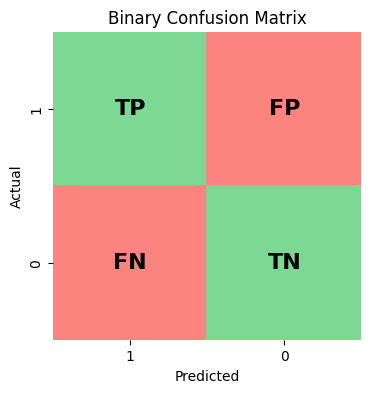

In [30]:
#Binary confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a dataframe for the confusion matrix
data = np.array([['TP', 'FP'], ['FN', 'TN']])
df_cm = pd.DataFrame(data, columns=['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])
df_cm = pd.DataFrame(data, columns=['1', '0'], index=['1', '0'])
# df_cm = pd.DataFrame(data)
# Define the background colors for each cell
green = '#7cd893'
red = '#fb857e'
cell_colors = np.array([[green, red],  # TP: green, FP: red
                        [red, green]]) # FN: red, TN: green

# Plot the heatmap with annotations (TP, TN, FP, FN)
plt.figure(figsize=(6, 4))

# Plot empty heatmap with custom cell colors
sns.heatmap(np.zeros_like(df_cm, dtype=float), annot=df_cm, fmt='', 
            cbar=False, square=True, linewidths=2, linecolor='black', 
            annot_kws={"size": 16, "weight": "bold", "color": "black"}, 
            xticklabels=df_cm.columns, yticklabels=df_cm.index)

# Access the current axes to apply the background colors manually
ax = plt.gca()

# Loop over each cell and set background color manually
for i in range(len(df_cm)):
    for j in range(len(df_cm.columns)):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=cell_colors[i, j], edgecolor='white', lw=2))

# Set axis labels
plt.title('Binary Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plot
plt.show()


C:\Users\maxdi\AppData\Local\Temp\ipykernel_11268\3057476103.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=cell_colors[i, j], edgecolor='white', lw=2))


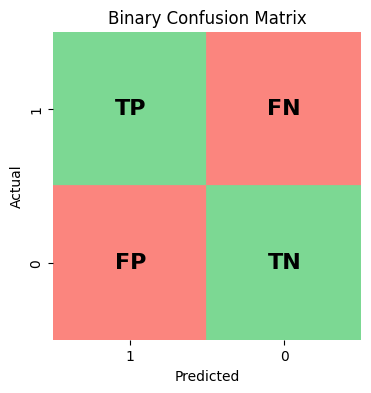

In [34]:
#Binary confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a dataframe for the confusion matrix
[]
data = np.array([['TP', 'FN'], ['FP', 'TN']])
df_cm = pd.DataFrame(data, columns=['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])
df_cm = pd.DataFrame(data, columns=['1', '0'], index=['1', '0'])
# df_cm = pd.DataFrame(data)
# Define the background colors for each cell
green = '#7cd893'
red = '#fb857e'
cell_colors = np.array([[green, red],  # TP: green, FP: red
                        [red, green]]) # FN: red, TN: green

# Plot the heatmap with annotations (TP, TN, FP, FN)
plt.figure(figsize=(6, 4))

# Plot empty heatmap with custom cell colors
sns.heatmap(np.zeros_like(df_cm, dtype=float), annot=df_cm, fmt='', 
            cbar=False, square=True, linewidths=2, linecolor='black', 
            annot_kws={"size": 16, "weight": "bold", "color": "black"}, 
            xticklabels=df_cm.columns, yticklabels=df_cm.index)

# Access the current axes to apply the background colors manually
ax = plt.gca()

# Loop over each cell and set background color manually
for i in range(len(df_cm)):
    for j in range(len(df_cm.columns)):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=cell_colors[i, j], edgecolor='white', lw=2))

# Set axis labels
plt.title('Binary Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plot
plt.show()


In [36]:
data.transpose

<function ndarray.transpose>

C:\Users\maxdi\AppData\Local\Temp\ipykernel_11268\2838642588.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=cell_colors[i, j], edgecolor='black', lw=2))


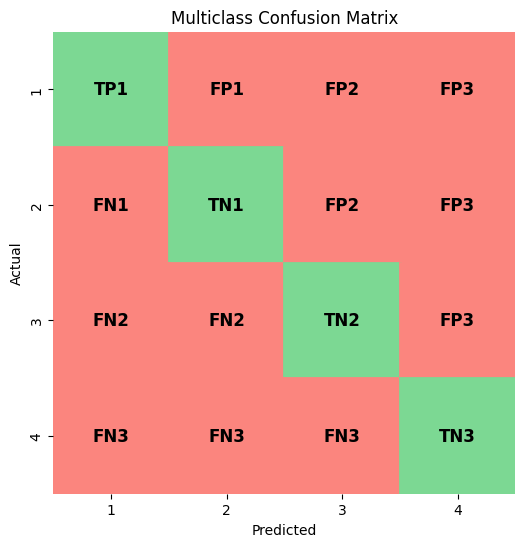

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a dataframe for the confusion matrix (4 classes)
data = np.array([['TP1', 'FP1', 'FP2', 'FP3'],
                 ['FN1', 'TN1', 'FP2', 'FP3'],
                 ['FN2', 'FN2', 'TN2', 'FP3'],
                 ['FN3', 'FN3', 'FN3', 'TN3']])

data = np.array([['TP1', 'FN1', 'FN1', 'FN1'],
                 ['FN2', 'TP2', 'FN2', 'FN2'],
                 ['FN3', 'FN3', 'TP3', 'FN3'],
                 ['FN4', 'FN4', 'FN4', 'TP4']])
df_cm = pd.DataFrame(data, columns=['1', '2', '3', '4'],
                     index=['1', '2', '3', '4'])

green = '#7cd893'
red = '#fb857e'

# Define the background colors for each cell
cell_colors = np.array([[green, red, red, red],  # TP1, FP1, FP2, FP3
                        [red, green, red, red],  # FN1, TN1, FP2, FP3
                        [red, red, green, red],  # FN2, FN2, TN2, FP3
                        [red, red, red, green]]) # FN3, FN3, FN3, TN3

# Plot the heatmap with annotations (TPs, TNs, FPs, FNs)
plt.figure(figsize=(8, 6))

# Plot empty heatmap with custom cell colors
sns.heatmap(np.zeros_like(df_cm, dtype=float), annot=df_cm, fmt='', 
            cbar=False, square=True, linewidths=2, linecolor='black', 
            annot_kws={"size": 12, "weight": "bold", "color": "black"},  # Black text
            xticklabels=df_cm.columns, yticklabels=df_cm.index)

# Access the current axes to apply the background colors manually
ax = plt.gca()

# Loop over each cell and set background color manually
for i in range(len(df_cm)):
    for j in range(len(df_cm.columns)):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=cell_colors[i, j], edgecolor='black', lw=2))

# Set axis labels
plt.title('Multiclass Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plot
plt.show()


In [ ]:
all_trees

In [ ]:
import numpy as np

def generate_all_bbok_splits(enc):
    c = len(bin(enc)[2:])
    a = np.arange(c, dtype=int)
    rc = a[(1 << a & enc).astype(bool)]

    if len(rc) == 1:
        return [(1 << rc[0], 0)]

    all_splits = []
    for sub_id in range(1, np.power(2, len(rc) - 1)):
        mask = format(sub_id, 'b').zfill(len(rc))
        mask = np.array(list(mask), dtype=int)

        c1_group = rc[mask.astype(bool)]
        c2_group = np.setdiff1d(rc, c1_group)

        all_splits.append((np.sum(1 << np.array(c1_group)), np.sum(1 << np.array(c2_group))))
    
    return all_splits

def generate_all(n, labels=None):
    all_ds = []  # all dichotomies
    s = []  # stack
    if labels is None:
        labels = np.arange(n, dtype=int)
    rc = np.sum([1 << i for i in labels])

    root_splits = generate_all_bbok_splits(rc)
    for root_split in root_splits:
        s.append(([root_split], root_split))

    while len(s) != 0:
        current_dichotomy, split = s.pop()

        if split[1] == 0:
            decoded_splits = [decode_split(split, labels) for split in current_dichotomy]
            decoded_splits = [tuple(tuple(sorted(tup)) for tup in pair) for pair in decoded_splits]
            all_ds.append(tuple(decoded_splits))
            continue

        for split_0 in generate_all_bbok_splits(split[0]):
            for split_1 in generate_all_bbok_splits(split[1]):
                new_dichotomy = current_dichotomy + [split_0, split_1]
                s.append((new_dichotomy, split_0))
                s.append((new_dichotomy, split_1))
    # print(all_ds)
    # decoded_splits = [decode_split(split, labels) for split in s]
    # decoded_splits = [tuple(tuple(sorted(tup)) for tup in pair) for pair in decoded_splits]

    return all_ds

In [ ]:
def defined_all_trees(n: int):
    """
    TODO remove this method and use something more rigourous. This function creates a list of all trees or combined models for a given 
    number of categories. 
    input:
        n: number of categories/classes
    output:
        list of all trees
    """
    categories = tuple(range(1, n+1))
    all_trees_normalized = generate_normalized_branches(categories)

    # Convert frozensets back to lists for readability
    all_trees_normalized_list = [sorted(list(map(list, tree))) for tree in all_trees_normalized]
    all_trees_normalized_list = [[sorted(branch, key=len, reverse=True) for branch in tree] for tree in all_trees_normalized_list]
    return all_trees_normalized_list

def stringify(node):
    """ Convert a tuple of numbers into a concatenated string. """
    return node

def generate_normalized_branches(categories):
    """
    Recursively generate all branches for the given categories with normalized order.
    This function ensures that each branch is represented in a standardized way to eliminate duplicates.
    """
    if len(categories) <= 1:
        return [set()]  # No branches can be formed from a single category

    branches_set = set()
    for left in generate_subsets(categories):
        right = tuple(set(categories) - set(left))

        # Generate branches for left and right subsets
        left_branches = generate_normalized_branches(left)
        right_branches = generate_normalized_branches(right)

        for l_branch_set in left_branches:
            for r_branch_set in right_branches:
                # Combine current split with left and right branches
                new_branch = tuple(sorted([left, right]))
                combined_branches = {new_branch}.union(l_branch_set, r_branch_set)
                branches_set.add(frozenset(combined_branches))  # Using frozenset to allow set of sets
    return branches_set

def generate_subsets(s):
    """ Generate all non-empty subsets of a set s. """
    subsets = []
    for r in range(1, len(s)):
        subsets.extend(combinations(s, r))
    return subsets

In [ ]:
trees_defined = defined_all_trees(10)

In [ ]:
trees_defined

In [ ]:
unique_elements = set()

for sublist in trees_defined:
    lil_one = list()
    for i in sublist:
        lil_one.append(tuple(i))
    unique_elements.add(tuple(lil_one))

# Convert set back to list if needed
unique_list = list(unique_elements)

# Print unique elements
print(unique_list)

In [ ]:
len(unique_list)